## Classification Using SVM
In this notebook, we'll explore the popular MNIST dataset and build an SVM model to classify handwritten digits. 

We'll divide the analysis into the following parts:

Data understanding and cleaning

Data preparation for model building

Building an SVM model - hyperparameter tuning, model evaluation etc.

## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [126]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
digit = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [127]:
test.shape

(28000, 784)

In [128]:
# about the dataset

# dimensions
print("Dimensions: ", digit.shape, "\n")

# data types
print(digit.info())

# head
digit.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
digit = digit.iloc[:12000]

In [130]:
# dimensions
print("Dimensions: ", digit.shape, "\n")

# data types
print(digit.info())

Dimensions:  (12000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 71.9 MB
None


In [131]:
print(digit.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [132]:
# Print unique labels
unique_labels = list(np.sort(digit['label'].unique()))
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [133]:
six = digit.iloc[5, 1:]
six.shape

(784,)

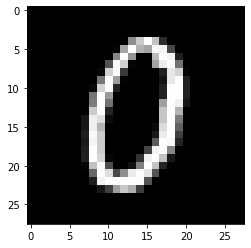

In [134]:
six = six.values.reshape(28, 28)
plt.imshow(six, cmap='gray')

In [135]:
# visualise the array
print(six[5:-5, 5:-5])

[[  0   0   0   0   0   0   5 165 254 179 163 249 244  72   0   0   0   0]
 [  0   0   0   0   0   0 135 254 150   0   0 189 254 243  31   0   0   0]
 [  0   0   0   0   0  82 248 209   5   0   0 164 236 254 115   0   0   0]
 [  0   0   0   0   8 211 254  58   0   0   0   0  33 230 212   6   0   0]
 [  0   0   0   0 119 254 156   3   0   0   0   0  18 230 254  33   0   0]
 [  0   0   0  10 212 254  35   0   0   0   0   0  33 254 254  33   0   0]
 [  0   0   0 116 254 154   3   0   0   0   0   0  33 254 254  33   0   0]
 [  0   0   0 124 254 115   0   0   0   0   0   0 160 254 239  23   0   0]
 [  0   0   0 203 254  35   0   0   0   0   0   0 197 254 178   0   0   0]
 [  0   0  23 239 221  11   0   0   0   0   0   0 198 255 123   0   0   0]
 [  0   0  23 238 178   0   0   0   0   0   0  10 219 254  96   0   0   0]
 [  0   0  30 249 204   0   0   0   0   0   0  25 235 254  62   0   0   0]
 [  0   0  26 243 204   0   0   0   0   0   0  91 254 248  36   0   0   0]
 [  0   0  33 254 204   0

<AxesSubplot:xlabel='label', ylabel='pixel35'>

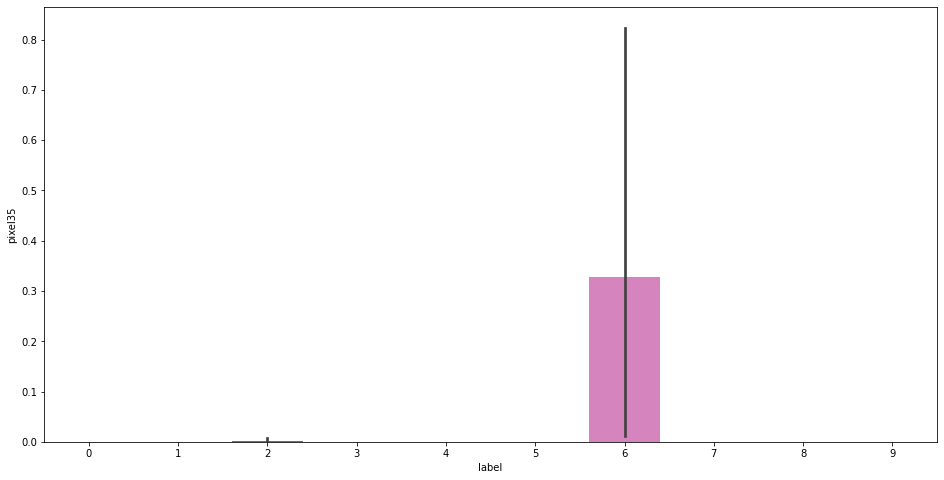

In [136]:
# basic plots: How do various attributes vary with the digit

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel35', 
            data=digit, 
            order=unique_labels)

<AxesSubplot:xlabel='label', ylabel='pixel240'>

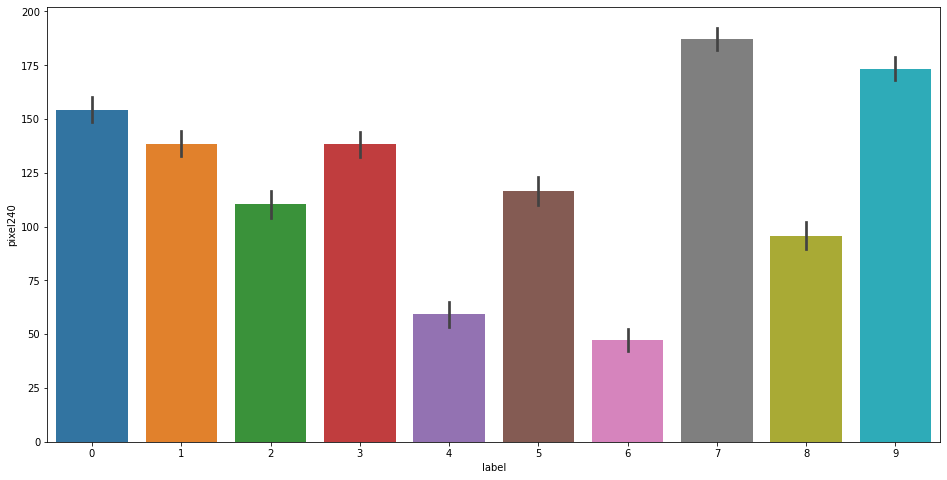

In [137]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel240', 
            data=digit, 
            order=unique_labels)

<AxesSubplot:xlabel='label', ylabel='pixel578'>

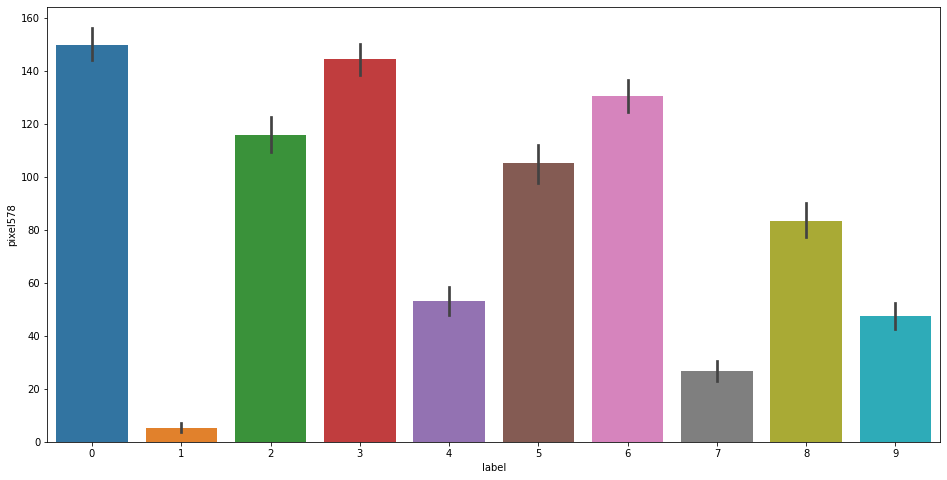

In [138]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel578', 
            data=digit, 
            order=unique_labels)

<AxesSubplot:xlabel='label', ylabel='pixel650'>

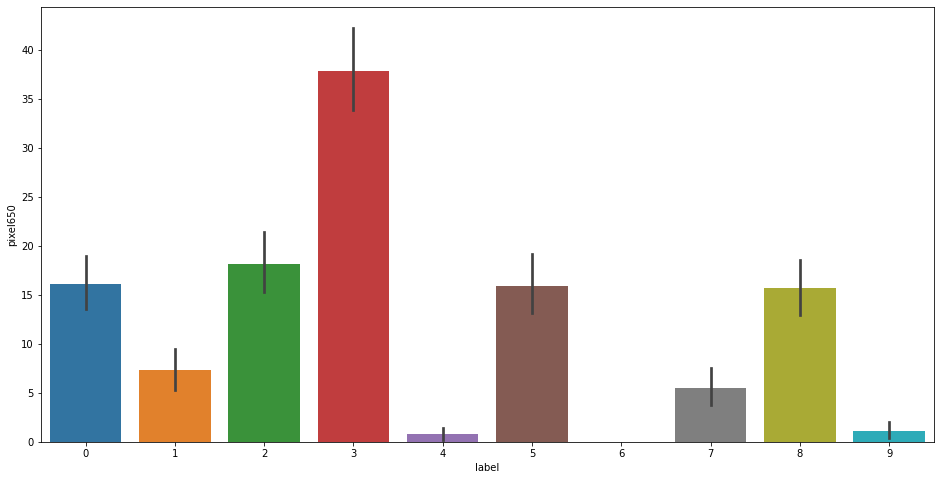

In [139]:
plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel650', 
            data=digit, 
            order=unique_labels)

In [140]:
# Summarise the counts of 'label' to see how many labels of each digit are present
digit.label.astype('category').value_counts()

1    1348
2    1243
7    1233
6    1214
3    1213
9    1172
0    1171
4    1159
8    1142
5    1105
Name: label, dtype: int64

In [141]:
# Summarise count in terms of percentage 
100*(round(digit.label.astype('category').value_counts()/len(digit.index), 4))

1    11.23
2    10.36
7    10.28
6    10.12
3    10.11
9     9.77
0     9.76
4     9.66
8     9.52
5     9.21
Name: label, dtype: float64

In [142]:
# average values/distributions of features
description = digit.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,12000.000000,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.0,12000.0,12000.0,12000.0
mean,4.436083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148667,0.101917,0.051583,0.021083,0.001833,0.0,0.0,0.0,0.0,0.0
std,2.878212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.163118,4.204323,3.162160,1.758379,0.200832,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,252.000000,177.000000,22.000000,0.0,0.0,0.0,0.0,0.0


In [143]:
# missing values - there are none
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Data Preparation

Let's conduct some data preparation steps before modeling. 

In [144]:
# splitting into X and y
X = digit.drop("label", axis = 1)
y = digit['label']

In [145]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [146]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [147]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9086111111111111 



The linear model gives approx. 88% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [148]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [149]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")


accuracy: 0.9366666666666666 



The non-linear model gives approx. 90.7% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [150]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 72.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [151]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,83.714521,6.055255,10.366371,0.211889,1,0.01,"{'C': 1, 'gamma': 0.01}",0.755357,0.717262,0.747024,...,0.742738,0.013275,12,0.999702,1.000000,0.999851,0.999851,1.000000,0.999881,0.000111
1,20.131079,0.210971,6.003179,0.107274,1,0.001,"{'C': 1, 'gamma': 0.001}",0.933333,0.928571,0.931548,...,0.932024,0.002176,4,0.974702,0.973958,0.975149,0.972768,0.973214,0.973958,0.000888
2,30.438726,1.099842,8.370067,0.327803,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.895833,0.895238,0.900595,...,0.902857,0.007391,8,0.918155,0.921131,0.919345,0.918304,0.916518,0.918690,0.001519
3,85.679168,2.242758,10.491776,0.203098,10,0.01,"{'C': 10, 'gamma': 0.01}",0.772619,0.736905,0.767857,...,0.759881,0.012312,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,17.457922,0.263037,5.579985,0.161410,10,0.001,"{'C': 10, 'gamma': 0.001}",0.945238,0.938095,0.938690,...,0.941786,0.002877,1,0.999107,0.999256,0.998810,0.999107,0.999702,0.999196,0.000292
5,13.737912,0.218584,5.058328,0.078951,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.927381,0.925595,0.930357,...,0.930833,0.004381,5,0.963393,0.962351,0.961161,0.961012,0.961905,0.961964,0.000866
6,78.687933,4.680769,9.739407,0.499760,100,0.01,"{'C': 100, 'gamma': 0.01}",0.772619,0.736905,0.767857,...,0.759881,0.012312,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,15.645157,0.617651,4.849444,0.022834,100,0.001,"{'C': 100, 'gamma': 0.001}",0.943452,0.938690,0.939881,...,0.941548,0.002041,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,9.176217,0.072267,3.747983,0.009439,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.925000,0.926786,0.927381,...,0.929167,0.003511,6,0.994643,0.995238,0.995685,0.994345,0.994048,0.994792,0.000595
9,74.268141,0.539908,9.265848,0.041409,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.772619,0.736905,0.767857,...,0.759881,0.012312,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


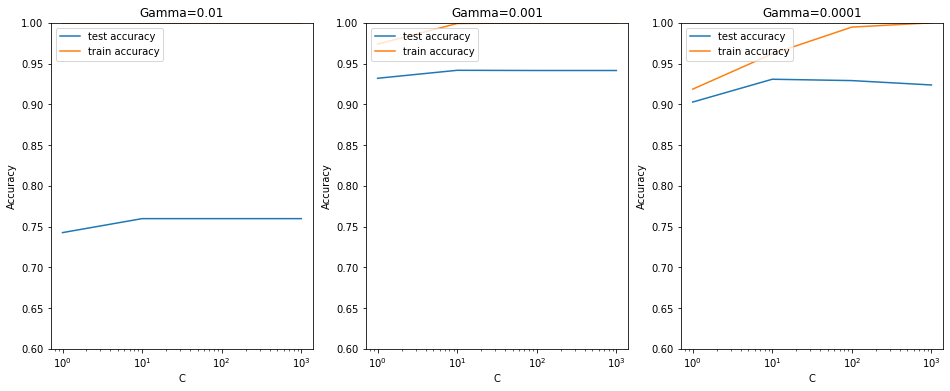

In [152]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [153]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9417857142857142 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [154]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
test_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9366666666666666 

[[338   0   3   0   0   0   4   0   3   0]
 [  0 357   3   1   1   0   2   3   2   0]
 [  1   2 340   3   4   1   1  11   5   0]
 [  0   2   8 358   0   5   1   6  15   1]
 [  0   2   7   1 327   2   1   3   0   4]
 [  1   1   1   2   0 298   6   7   3   2]
 [  4   0   2   0   1   3 355   6   2   0]
 [  0   3   5   0   3   0   1 381   0  13]
 [  2   2   1   4   1   5   1   4 308   3]
 [  1   1   2   5  10   0   0  11   1 310]] 



In [155]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       348
           1       0.96      0.97      0.97       369
           2       0.91      0.92      0.92       368
           3       0.96      0.90      0.93       396
           4       0.94      0.94      0.94       347
           5       0.95      0.93      0.94       321
           6       0.95      0.95      0.95       373
           7       0.88      0.94      0.91       406
           8       0.91      0.93      0.92       331
           9       0.93      0.91      0.92       341

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600



Overall accuracy of the model is 91%. Here only 10% of the training data is used. model performance would be increased if we use the whole data.

In [156]:
test_pred

array([6, 5, 4, ..., 3, 1, 9], dtype=int64)

##### Let us use our final model on test data (test.csv)

In [157]:
test = pd.read_csv("test.csv")

In [158]:
test.shape

(28000, 784)

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [160]:
six = test.iloc[5,:]
six.shape

(784,)

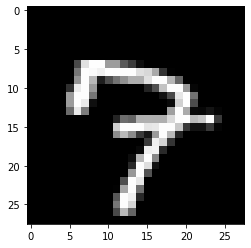

In [161]:
six = six.values.reshape(28, 28)
plt.imshow(six, cmap='gray')

In [162]:
# scaling the features
test = scale(test)

In [163]:
test.shape

(28000, 784)

In [164]:
# model.predict
test_pred = model.predict(test)

In [165]:
test_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [166]:
test_results = pd.DataFrame({'Label':test_pred})
test_results.nunique()

Label    10
dtype: int64

In [167]:
test_results.head(10)

,Label
0,2
1,0
2,9
3,4
4,3
5,7
6,0
7,3
8,0
9,3


In [168]:
# Exporting the predicted values 
test_results.to_csv("submission.csv")

## Conclusion

The accuracy achieved using a non-linear kernel is 91% which is mush higher than that of a linear one 88%. We can conclude that the problem is highly non-linear in nature.